# Model RandomForestRegressor

- Several columns were dropped
- Simple optimized model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.1.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### Data for train the model

In [7]:
X = Mental_1.drop(columns=['id', 'Depression'],axis=1)
y = Mental_1['Depression']

In [9]:
# check the param of the model
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# modification of the param
params = {'ccp_alpha': [0.0 ,0.01],
 'max_depth': [3, 4, 5, 6], # branches of the trees
 'max_features': [0.1, 0.3, 0.6], # features considered
 'max_samples': [0.4, 0.6,0.8], # test-train population
 'n_estimators': [1000], # number trees
 'n_jobs': [-1]} # multicore

In [13]:
n_cv = 5
model = RandomForestRegressor()

scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# I made the evaluation with GridSeacrh
grid_solver = GridSearchCV(estimator = model, # model to train
                           param_grid = params, # param_grid
                           scoring = scoring,
                           cv = n_cv, #number of independent 
                           refit = 'neg_mean_squared_error',
                           verbose = 2) 

In [15]:
# searchin for the trees in the forest.
model_result = grid_solver.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.2s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.2s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.2s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.2s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.4, n_estimators=1000, n_jobs=-1; total time=   1.2s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   1.4s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, n_jobs=-1; total time=   1.4s
[CV] END ccp_alpha=0.0, max_depth=3, max_features=0.1, max_samples=0.6, n_estimators=1000, 

In [17]:
model_result.best_estimator_

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.4,
                      n_estimators=1000, n_jobs=-1)

In [19]:
results = model_result.cv_results_
results = pd.DataFrame(results)

In [21]:
results[['mean_test_neg_mean_squared_error','params','param_max_depth','param_max_samples']]

,mean_test_neg_mean_squared_error,params,param_max_depth,param_max_samples
0,-0.094509,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.4
1,-0.094613,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.6
2,-0.094719,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.8
3,-0.075707,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.4
4,-0.076191,"{'ccp_alpha': 0.0, 'max_depth': 3, 'max_featur...",3,0.6
...,...,...,...,...
67,-0.085433,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.6
68,-0.086036,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.8
69,-0.068322,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.4
70,-0.068515,"{'ccp_alpha': 0.01, 'max_depth': 6, 'max_featu...",6,0.6


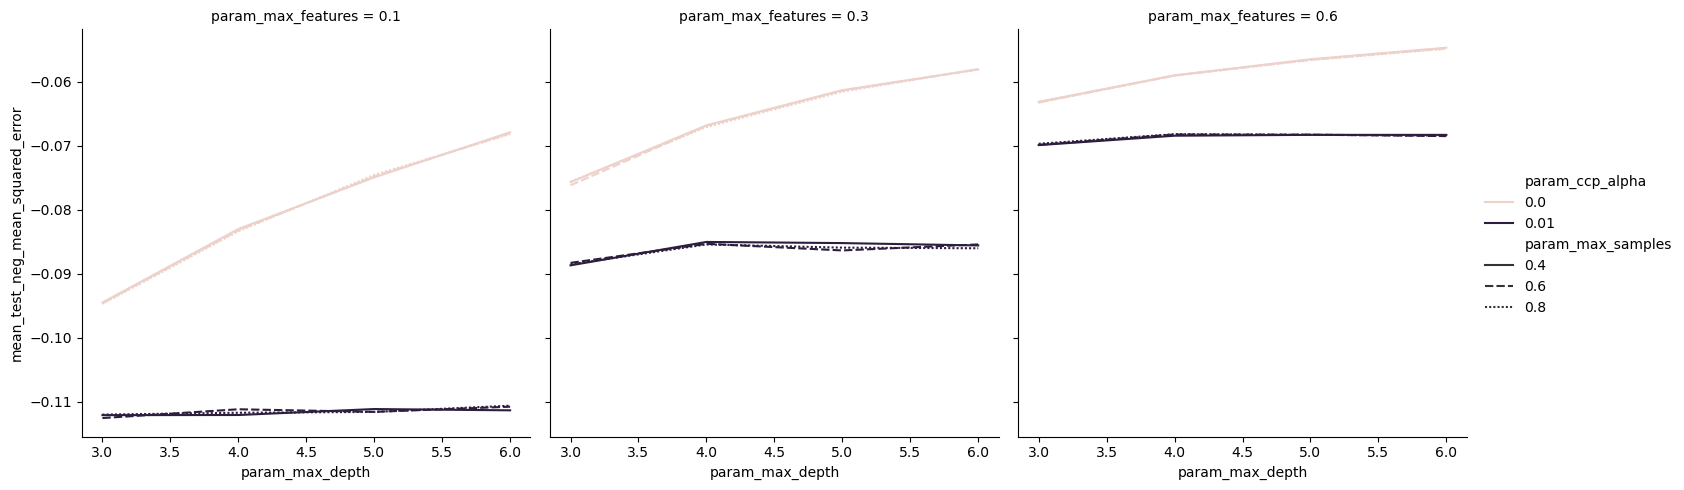

In [23]:
sns.relplot(x = "param_max_depth", 
            y = "mean_test_neg_mean_squared_error", # error en la y
            style="param_max_samples", # numero maximo de % filas por cada arbol
            hue="param_ccp_alpha",
            col="param_max_features",
            kind = "line", data=results)

In [28]:
dep_resoult = model_result.best_estimator_

In [31]:
y_pred_V1 = dep_resoult.predict(X)
y_pred_V1

array([0.00488329, 0.83949512, 0.54206084, ..., 0.2711101 , 0.0624263 ,
       0.76059094])

In [34]:
threshold = 0.5
y_pred_V1_bin = np.where(y_pred_V1 > threshold, 1, 0)
y_pred_V1_bin

array([0, 1, 1, ..., 0, 0, 1])

In [37]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(y,y_pred_V1_bin)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

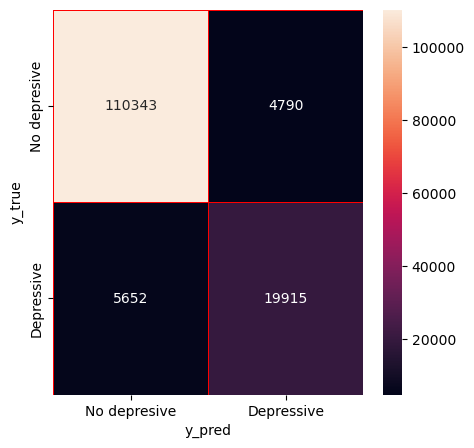

In [40]:
confusion(y,y_pred_V1_bin)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred_V1_bin)

0.9257853589196873

The cross-validation by 5 had an accuracy of 0.925785 is slightly better than doing it by 3 or 7.

In [25]:
grid_solver.best_estimator_

RandomForestRegressor(max_depth=6, max_features=0.6, max_samples=0.4,
                      n_estimators=1000, n_jobs=-1)

# apply the best estimator to Test dataframe

In [1]:
Mental_1 = pd.read_csv('Datasheet/MH.Clean.Test.1.csv')

NameError: name 'pd' is not defined

In [ ]:
Mental_1.drop(columns=['id'],axis=1)

In [ ]:
modelo_MH = model_result.best_estimator_

In [ ]:
modelo_MH

In [ ]:
y_pre = modelo_MH.predict(Mental_1.drop(columns=['id'],axis=1))

In [ ]:
y_pre

In [ ]:
# define a threshold
threshold = 0.5
y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [ ]:
y_pre_bin

In [ ]:
Mental_1['Depression']= y_pre_bin

In [ ]:
Mental_1

In [ ]:
Mental_1['Depression'].value_counts()

In [ ]:
print(Mental_1.keys())

In [ ]:
sample_submission = Mental_1.drop(columns=['Gender', 'Age', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Pressure', 'Satisfaction'],axis=1)

In [ ]:
sample_submission

In [ ]:
sample_submission.to_csv('sample_submission_1.csv', index=False)

# Score: 0.92707

sample_submission_1.csv

